## Checking SN values

Natalie Gosnell  
July 7, 2016

The values calculated straight from the variance didn't seem to hang with the pipeline SN values. This is a quick check for order 113...

In [45]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [46]:
sns.set_context('notebook')

In [47]:
!ls -1 ../data/raw/

S1063_o110.fits
S1063_o113.fits
S1063_o115.fits
SDCH_20150425_0064.sn.fits
SDCH_20150425_0064.spec_a0v.fits
SDCH_20150425_0064.variance.fits


#### This is the SN file from the pipeline output

In [48]:
snhdu = fits.open("../data/raw/SDCH_20150425_0064.sn.fits")

In [49]:
snhdu.info()

Filename: ../data/raw/SDCH_20150425_0064.sn.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     181   (2048, 28)   float32   


In [50]:
hdu = fits.open("../data/raw/SDCH_20150425_0064.spec_a0v.fits")

In [51]:
varhdu = fits.open("../data/raw/SDCH_20150425_0064.variance.fits")

In [52]:
dat = hdu[0]
wav = hdu[1]
sn = snhdu[0]
var = varhdu[0]
a0 = hdu[3]
rawspec = hdu[2]

In [53]:
o110 = 12  
o113 = 15  
o115 = 17

In [54]:
flux113 = dat.data[o113]
fluxcut113 = flux113[~np.isnan(flux113)]
wave113 = wav.data[o113]
wavecut113 = wave113[~np.isnan(flux113)]
sn113 = sn.data[o113]
sncut113 = sn113[~np.isnan(flux113)]
var113 = var.data[o113]
varcut113 = var113[~np.isnan(flux113)]
a0113 = a0.data[o113]
a0cut113 = a0113[~np.isnan(flux113)]
rawspec113 = rawspec.data[o113]
rawspeccut113 = rawspec113[~np.isnan(flux113)]

In [55]:
scale_factor113 = rawspeccut113/a0cut113
sigma_raw113 = np.sqrt(varcut113)
sig_scaled113 = sigma_raw113/scale_factor113
signal_113 = rawspeccut113/scale_factor113
calc_sn113 = signal_113/sig_scaled113

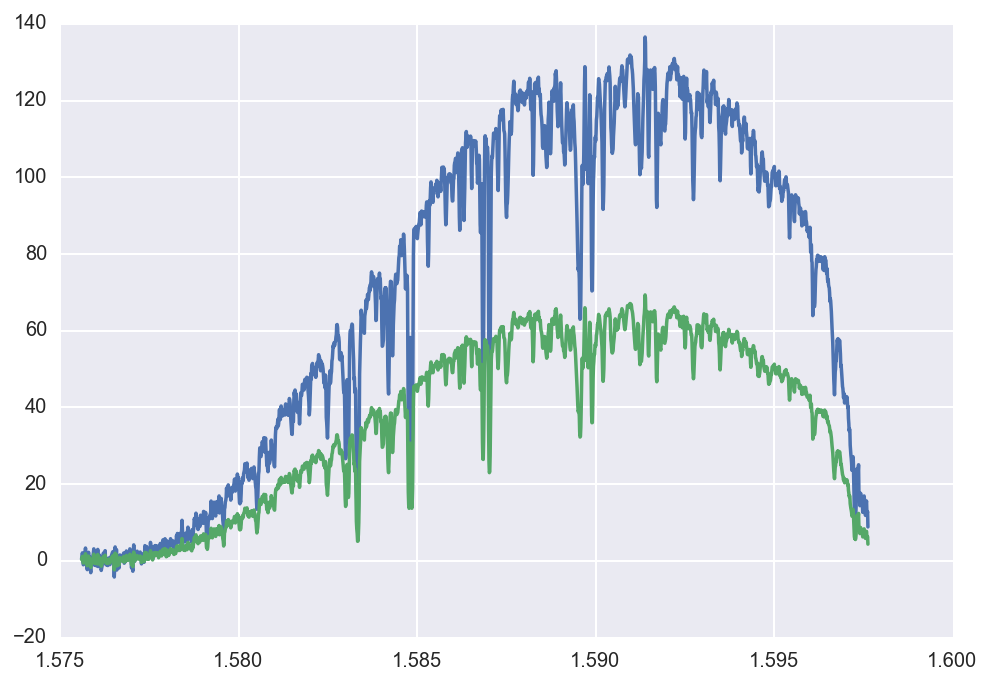

In [56]:
plt.plot(wavecut113,sncut113)
plt.plot(wavecut113,calc_sn113)
plt.show()

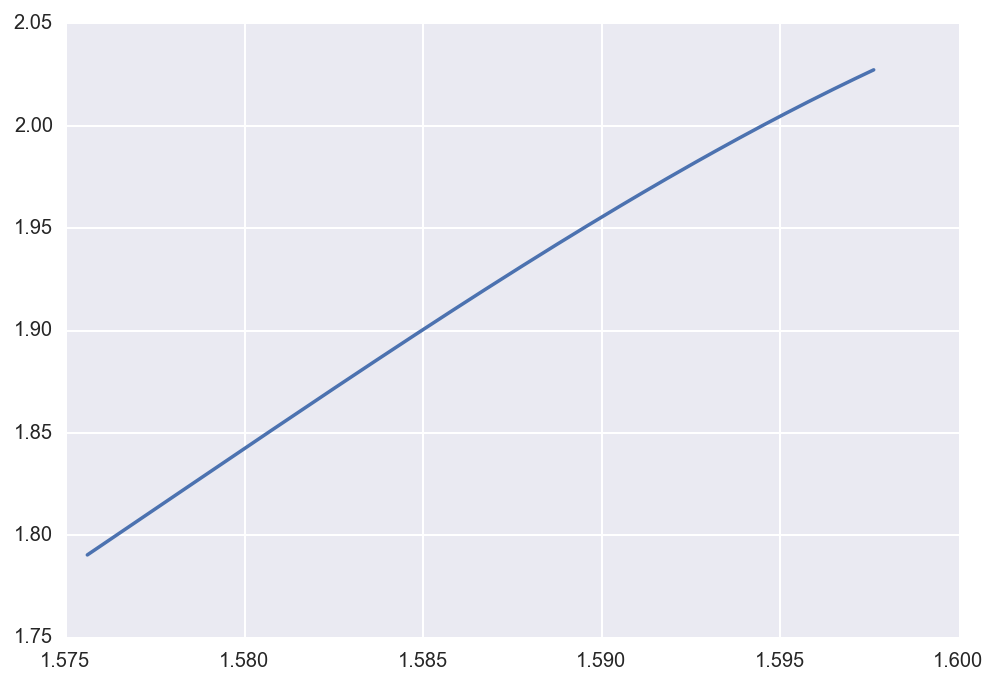

In [57]:
plt.plot(wavecut113,(sncut113/calc_sn113))
plt.show()

### Is this a resolution element thing? SN is giving the SNR per res element, but we're calculating the SNR per pix? 

In [58]:
median_S_N113 = np.nanmedian(sncut113)
print("Median Signal to Noise Ratio of Order 113: {:0.1f} per pixel".format(median_S_N113))

Median Signal to Noise Ratio of Order 113: 86.7 per pixel


### Even without trimming noise, the median SN is almost 90, but with the other method it's only ~40

Same wavelength cut used in subsub_checking_new_data:

In [59]:
gi113 = (wavecut113 > 1.580) & (wavecut113 < 1.597)

In [60]:
wl_113 = wavecut113
fl_113 = fluxcut113
sn_113 = sncut113

In [61]:
fls_out113 = fl_113[gi113]
wls_out113 = wl_113[gi113]*10000.0
sn_out113 = sn_113[gi113]
msk_out113 = np.ones(len(wls_out113), dtype=int)

In [62]:
new_median_S_N113 = np.nanmedian(sn_out113)
print("Median Signal to Noise Ratio of Order 113: {:0.1f} per pixel".format(new_median_S_N113))

Median Signal to Noise Ratio of Order 113: 99.2 per pixel


### The trimmed SNR is ~100, which is what I expected. Still a mystery.